In [2]:
import numpy as np
from os.path import exists
import sys

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import AutoMinorLocator

figureOutput='BindingEnergies'
error_on=0

SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

rcParams['axes.linewidth']   = 2
rcParams['figure.figsize']   = 5,4
rcParams['figure.dpi']       = 600

rcParams['xtick.major.size']  = 7
rcParams['xtick.major.width'] = 1.5
rcParams['xtick.minor.size']  = 5
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size']  = 7
rcParams['ytick.major.width'] = 1.5
rcParams['ytick.minor.size']  = 5
rcParams['ytick.minor.width'] = 1

colors=['blueviolet','g','r','limegreen','pink','orangered','k','navy']

In [3]:
valenceElectrons = {'Cr': 6, 'Ti': 4, 'V': 5, 'W': 6} #valence electrons
metallicRadii = {'Cr': 1.28, 'Ti': 1.47, 'V': 1.34, 'W': 1.39} #angstroms

# Valence electron concentration
# $VEC=\sum_i(n_i*n^e_i) +(4-6)$

Cr 6
Ti 4
V 5


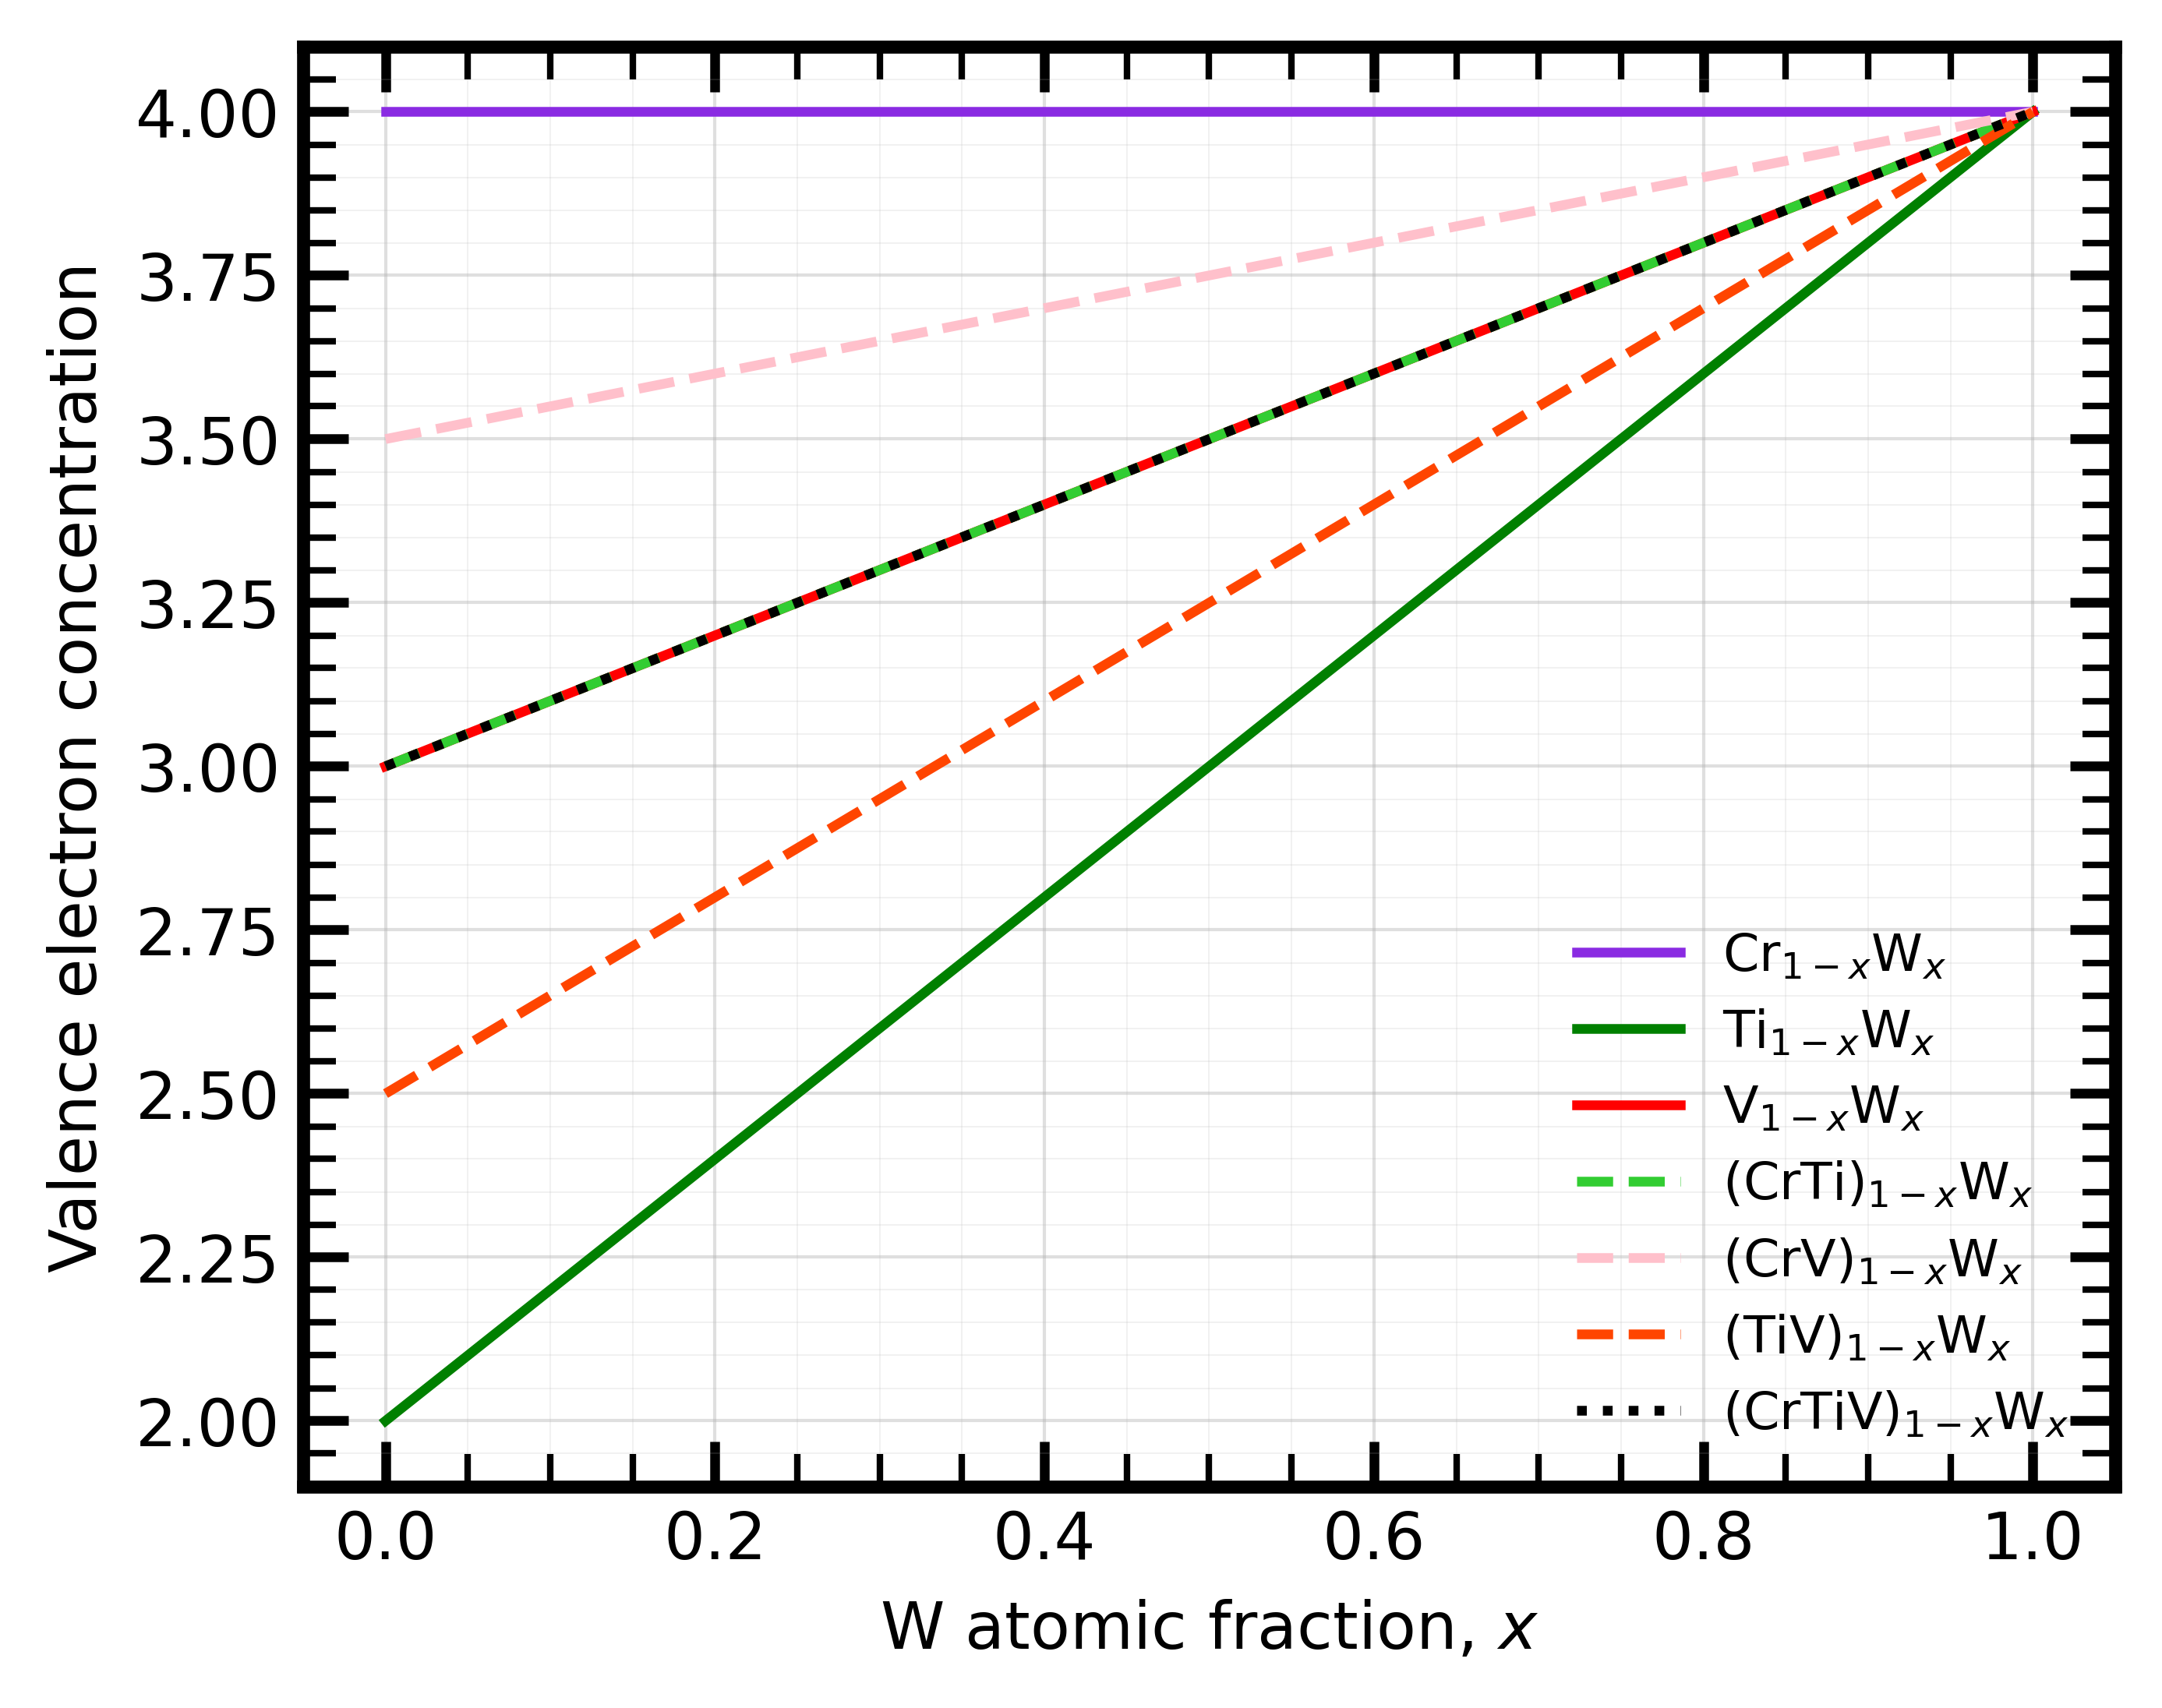

In [16]:
x=np.linspace(0, 1, num=101)
icolor=0
ax=plt.axes()
for symbol,nValEl in valenceElectrons.items():
    if(symbol!='W'):
        print(symbol,nValEl)
        VEC=(1-x)*nValEl+(x)*valenceElectrons['W']+4-6
        plt.plot(x,VEC,label=symbol+"$_{1-x}$"+r"W$_x$".format(symbol),c=colors[icolor])
        icolor+=1
for symbols in [['Cr','Ti'],['Cr','V'],['Ti','V']]:
    VEC=x*valenceElectrons['W'] + ((1-x)/2)*valenceElectrons[symbols[0]] + ((1-x)/2)*valenceElectrons[symbols[1]] +(4-6)
    plt.plot(x,VEC,label='({:s}{:s})'.format(symbols[0],symbols[1])+r'$_{1-x}$'+'W$_x$',linestyle='--',c=colors[icolor])
    icolor+=1

#Cr-Ti-V-W
VEC=x*valenceElectrons['W'] + ((1-x)/3)*valenceElectrons['Cr'] + ((1-x)/3)*valenceElectrons['Ti'] + ((1-x)/3)*valenceElectrons['V'] + (4-6)
plt.plot(x,VEC,label='(CrTiV)'+'$_{1-x}$'+'W$_x$',linestyle=':',c=colors[icolor])


plt.legend(frameon=0,fontsize=8)
plt.xlabel('W atomic fraction, $x$')
plt.ylabel('Valence electron concentration')

ax.tick_params(axis='both',which='both',direction='in',colors='k',\
               bottom=True,top=True,left=True,right=True,\
               #labelbottom=True, labeltop=True, labelleft=True, labelright=True,\
               labelrotation=0)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.grid(alpha=0.4,which='major',linewidth=0.5)
plt.grid(alpha=0.2,which='minor',linewidth=0.2)

# Lattice mismatch, $\delta=100*\sqrt{ \sum_i n_i*(1-\frac{r_i}{\bar{r}})^2}$

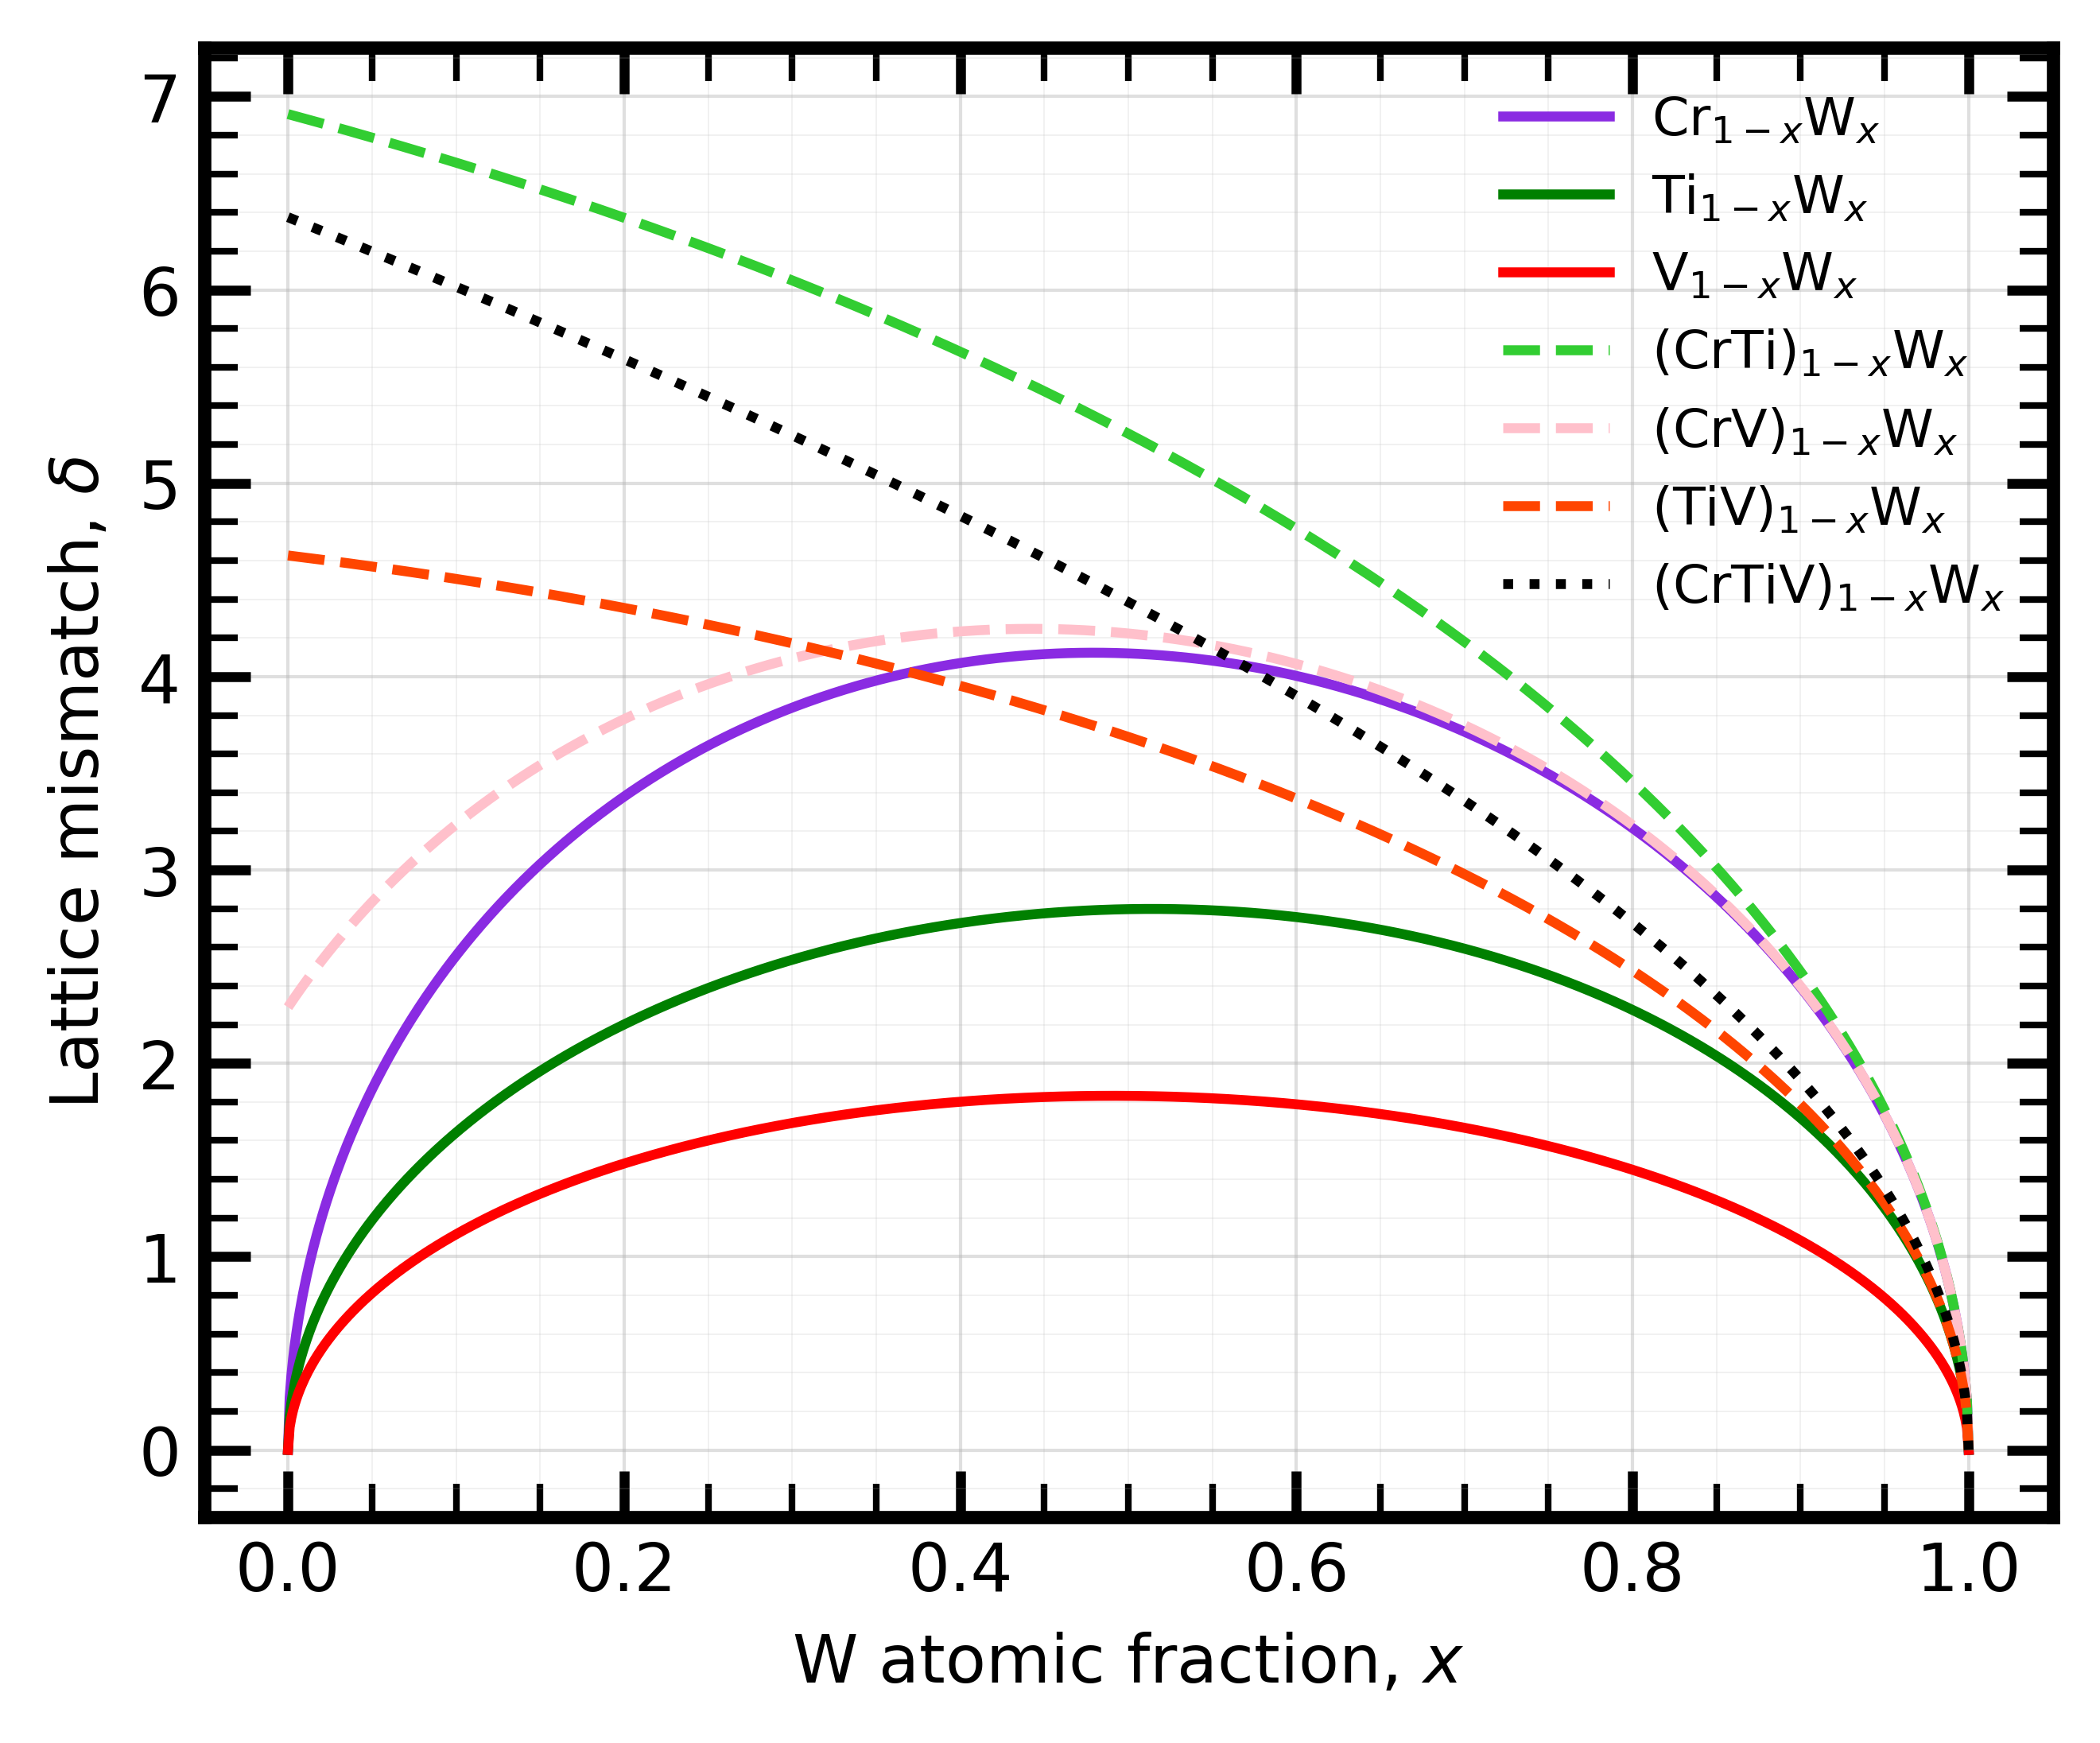

In [12]:
x=np.array(np.linspace(0, 1, num=1001))
icolor=0
ax=plt.axes()
for symbol,r in metallicRadii.items():
    if(symbol!='W'):
        rMean=(1-x)*r+x*metallicRadii['W']
        delta= 100*np.sqrt((1-x)*(1-r/rMean)**2 + x*(1-metallicRadii['W']/rMean)**2)
        plt.plot(x,delta,c=colors[icolor],label='{:s}'.format(symbol)+r'$_{1-x}$'+'W$_x$')
        icolor+=1
for symbols in [['Cr','Ti'],['Cr','V'],['Ti','V']]:
    rMean=((1-x)/2)*metallicRadii[symbols[0]]+((1-x)/2)*metallicRadii[symbols[1]]+x*metallicRadii['W']
    delta= 100*np.sqrt(
        ((1-x)/2)*(1-metallicRadii[symbols[0]]/rMean)**2 + 
        ((1-x)/2)*(1-metallicRadii[symbols[0]]/rMean)**2 + 
        x*(1-metallicRadii['W']/rMean)**2
        )
    plt.plot(x,delta,label='({:s}{:s})'.format(symbols[0],symbols[1])+r'$_{1-x}$'+'W$_x$',linestyle='--',c=colors[icolor])
    icolor+=1

delta= 100*np.sqrt(
    ((1-x)/3)*(1-metallicRadii['Cr']/rMean)**2 + 
    ((1-x)/3)*(1-metallicRadii['Ti']/rMean)**2 + 
    ((1-x)/3)*(1-metallicRadii['V']/rMean)**2 + 
    x*(1-metallicRadii['W']/rMean)**2
    )
plt.plot(x,delta,label='(CrTiV)'+r'$_{1-x}$'+'W$_x$',linestyle=':',c=colors[icolor])

plt.legend(frameon=0,fontsize=8)
plt.xlabel('W atomic fraction, $x$')
plt.ylabel('Lattice mismatch, $\delta$')

ax.tick_params(axis='both',which='both',direction='in',colors='k',\
               bottom=True,top=True,left=True,right=True,\
               #labelbottom=True, labeltop=True, labelleft=True, labelright=True,\
               labelrotation=0)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.grid(alpha=0.4,which='major',linewidth=0.5)
plt.grid(alpha=0.2,which='minor',linewidth=0.2)